# Train Curves
The following notebook reads log info such as loss and various metrics and plots them on graph.

In [1]:
import re
import matplotlib.pyplot as plt

loss_pattern = re.compile(r'epoch=(\d+)/\d+, loss=([\d.e-]+), lr=[\d.e-]+')
eval_pattern = re.compile(
    r'\[EVAL\] epoch: (\d+)/\d+, proj_psnr: ([\d.]+), proj_ssim: ([\d.]+), psnr_3d: ([\d.]+), ssim_3d: ([\d.]+)')

In [2]:
def get_loss_curve(log_file, method_name, data_name):
    loss_info = {
        "method_name": method_name,
        'data_name': data_name,
        "epochs_loss": [],
        "loss_values": []
    }

    with open(log_file, 'r') as f:
        for line in f:
            loss_match = loss_pattern.search(line)
            if loss_match:
                epoch, loss = int(loss_match.group(1)), float(loss_match.group(2))
                if epoch % 10 == 0:
                    loss_info["epochs_loss"].append(epoch)
                    loss_info["loss_values"].append(loss)

    return loss_info

def get_eval_curve(log_file, method_name, data_name):
    eval_info = {
        "method_name": method_name,
        "data_name": data_name,
        "eval_epochs": [],
        "proj_psnr": [],
        "proj_ssim": [],
        "psnr_3d": [],
        "ssim_3d": []
    }

    with open(log_file, 'r') as f:
        for line in f:
            # Extract evaluation metrics
            eval_match = eval_pattern.search(line)
            if eval_match:
                epoch = int(eval_match.group(1))
                eval_info["eval_epochs"].append(epoch)
                eval_info["proj_psnr"].append(float(eval_match.group(2)))
                eval_info['proj_ssim'].append(float(eval_match.group(3)))
                eval_info['psnr_3d'].append(float(eval_match.group(4)))
                eval_info['ssim_3d'].append(float(eval_match.group(5)))
    
    return eval_info

def plot_loss_curve(list_loss_info):
    plt.figure(figsize=(8, 4))
    
    for loss_info in list_loss_info:
        method_name, data_name, epochs_loss, loss_values = loss_info.values()
        plt.plot(epochs_loss, loss_values, label=f"{method_name}", marker='o')
    
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.yscale("log")
    plt.title(f"Loss on {data_name} dataset")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

def plot_eval_curve(list_eval_info, metric_name='proj_psnr'):
    plt.figure(figsize=(6, 3))

    for eval_info in list_eval_info:
        method_name, data_name, eval_epochs, proj_psnr, proj_ssim, psnr_3d, ssim_3d = eval_info.values()

        metric_to_plot = None
        if metric_name == 'proj_psnr':
            metric_to_plot = proj_psnr
        elif metric_name == 'proj_ssim':
            metric_to_plot = proj_ssim
        elif metric_name == 'psnr_3d':
            metric_to_plot = psnr_3d
        elif metric_name == 'ssim_3d':
            metric_to_plot = ssim_3d
        else:
            raise ValueError('Unknown metric.')

        plt.plot(eval_epochs, metric_to_plot, label=f"{method_name}", marker='o')

    plt.xlabel("Epoch")
    plt.ylabel("Metrics")
    plt.title(f"{metric_name} on {data_name} dataset")
    plt.legend()
    plt.grid()
    plt.show()


## Experiment 0 - Window Selection

### Chest Dataset

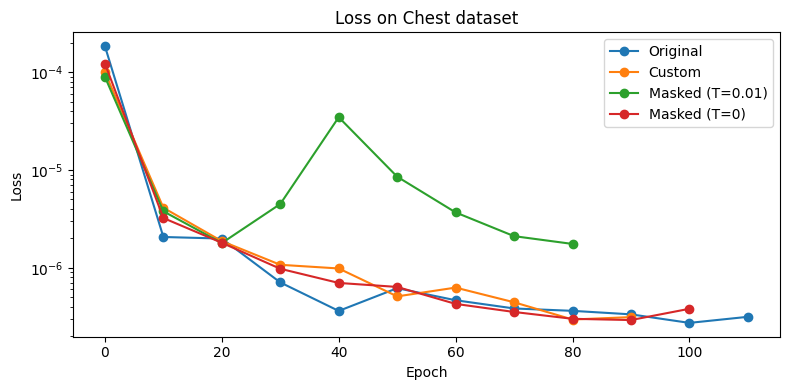

In [10]:
loss_original = get_loss_curve(log_file="logs/0_experiment/chest/original/log.txt", method_name='Original', data_name='Chest')
loss_custom = get_loss_curve(log_file="logs/0_experiment/chest/custom/log.txt", method_name='Custom', data_name='Chest')
loss_masked_001 = get_loss_curve(log_file="logs/0_experiment/chest/masked/threshold_001/log.txt", method_name='Masked (T=0.01)', data_name='Chest')
loss_masked_000 = get_loss_curve(log_file="logs/0_experiment/chest/masked/threshold_000/log.txt", method_name='Masked (T=0)', data_name='Chest')

list_loss_info = [loss_original, loss_custom, loss_masked_001, loss_masked_000]
plot_loss_curve(list_loss_info)

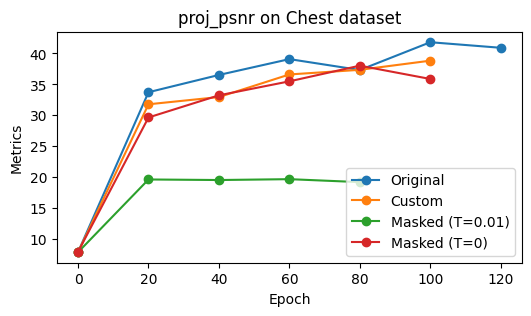

In [11]:
eval_original = get_eval_curve(log_file="logs/0_experiment/chest/original/log.txt", method_name='Original', data_name='Chest')
eval_custom = get_eval_curve(log_file="logs/0_experiment/chest/custom/log.txt", method_name='Custom', data_name='Chest')
eval_mask_001 = get_eval_curve(log_file="logs/0_experiment/chest//masked/threshold_001/log.txt", method_name='Masked (T=0.01)', data_name='Chest')
eval_mask_000 = get_eval_curve(log_file="logs/0_experiment/chest//masked/threshold_000/log.txt", method_name='Masked (T=0)', data_name='Chest')

list_eval_info = [eval_original, eval_custom, eval_mask_001, eval_mask_000]
plot_eval_curve(list_eval_info, metric_name='proj_psnr')


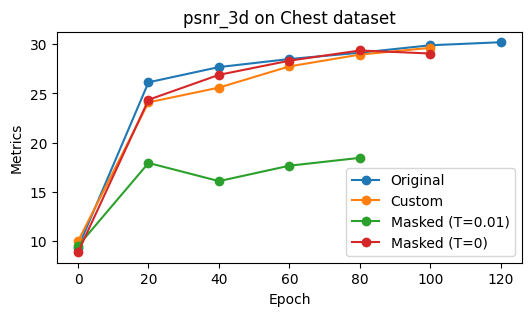

In [12]:
plot_eval_curve(list_eval_info, metric_name='psnr_3d')

### Bonsai Dataset

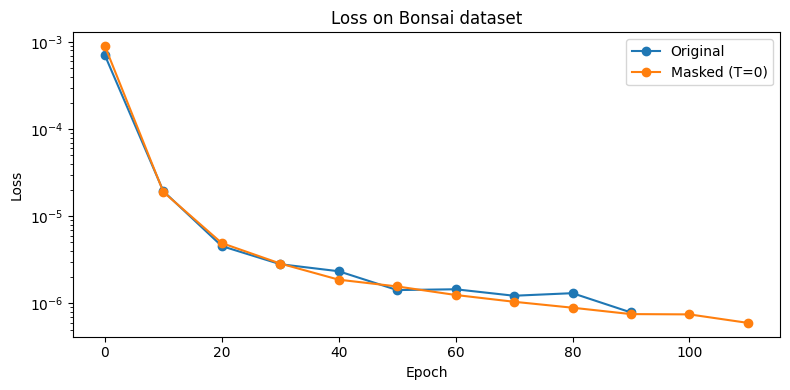

In [15]:
loss_original = get_loss_curve(log_file="logs/0_experiment/bonsai/original/log.txt", method_name='Original', data_name='Bonsai')
loss_masked_000 = get_loss_curve(log_file="logs/0_experiment/bonsai/masked/log.txt", method_name='Masked (T=0)', data_name='Bonsai')

list_loss_info = [loss_original, loss_masked_000]
plot_loss_curve(list_loss_info)

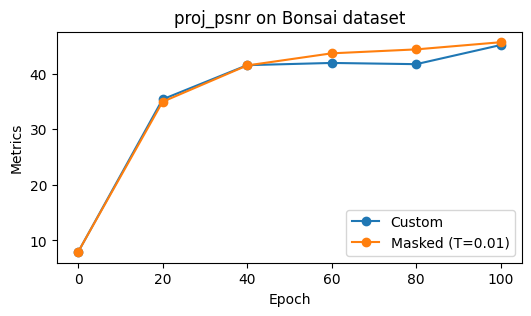

In [20]:
eval_original = get_eval_curve(log_file="logs/0_experiment/bonsai/original/log.txt", method_name='Custom', data_name='Bonsai')
eval_mask_000 = get_eval_curve(log_file="logs/0_experiment/bonsai/masked/log.txt", method_name='Masked (T=0.01)', data_name='Bonsai')

list_eval_info = [eval_original, eval_mask_000]
plot_eval_curve(list_eval_info, metric_name='proj_psnr')

### Battery Dataset

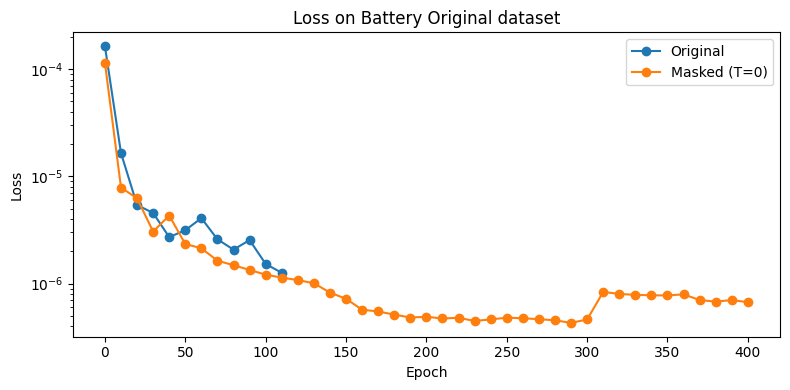

In [25]:
loss_original = get_loss_curve(log_file="logs/0_experiment/battery/original/log.txt", method_name='Original', data_name='Battery')
loss_masked_000 = get_loss_curve(log_file="logs/0_experiment/battery/masked/log.txt", method_name='Masked (T=0)', data_name='Battery')

list_loss_info = [loss_original, loss_masked_000]
plot_loss_curve(list_loss_info)

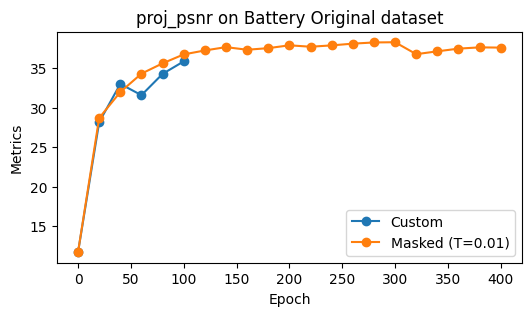

In [26]:
eval_original = get_eval_curve(log_file="logs/0_experiment/battery_original/original/log.txt", method_name='Custom', data_name='Battery')
eval_mask_000 = get_eval_curve(log_file="logs/0_experiment/battery_original/masked/log.txt", method_name='Masked (T=0.01)', data_name='Battery')

list_eval_info = [eval_original, eval_mask_000]
plot_eval_curve(list_eval_info, metric_name='proj_psnr')

## Experiment 1 - Fine Sampling

### A) Absolute Difference vs Smooth+Square+Baseline

#### Chest

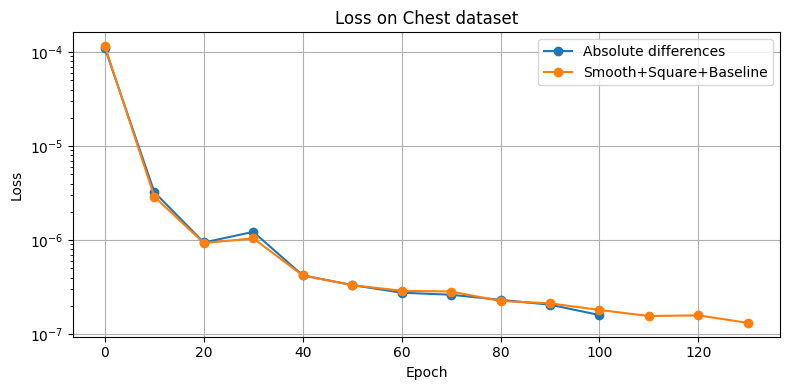

In [9]:
loss_absolute = get_loss_curve(log_file="logs/1_experiment/a_test/chest/absolute/log.txt", method_name='Absolute differences', data_name='Chest')
loss_enhanced = get_loss_curve(log_file="logs/1_experiment/a_test/chest/enhanced/log.txt", method_name='Smooth+Square+Baseline', data_name='Chest')

list_loss_info = [loss_absolute, loss_enhanced]
plot_loss_curve(list_loss_info)

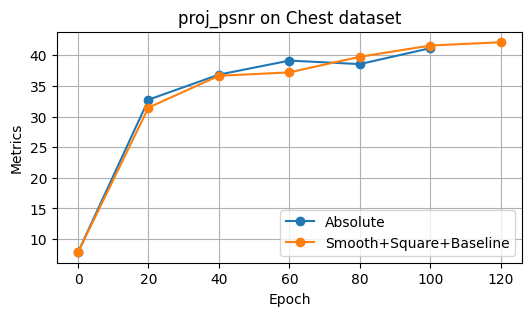

In [11]:
eval_absolute = get_eval_curve(log_file="logs/1_experiment/a_test/chest/absolute/log.txt", method_name='Absolute', data_name='Chest')
eval_enhanced = get_eval_curve(log_file="logs/1_experiment/a_test/chest/enhanced/log.txt", method_name='Smooth+Square+Baseline', data_name='Chest')

list_eval_info = [eval_absolute, eval_enhanced]
plot_eval_curve(list_eval_info, metric_name='proj_psnr')

### B) Number of fine samples

#### Chest

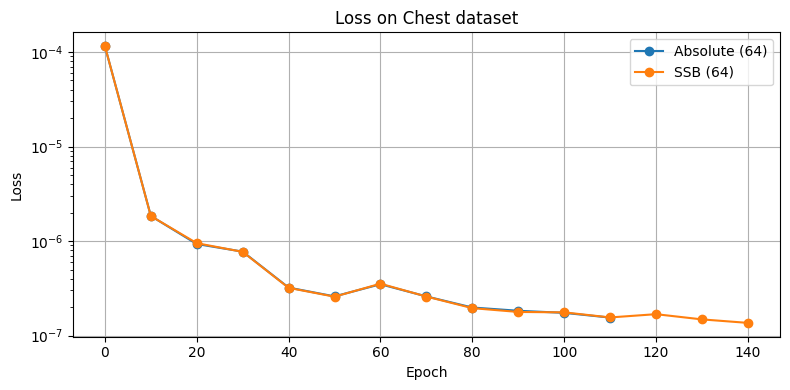

In [14]:
loss_absolute = get_loss_curve(log_file="logs/1_experiment/b_test/chest/absolute_64/log.txt", method_name='Absolute (64)', data_name='Chest')
loss_enhanced = get_loss_curve(log_file="logs/1_experiment/b_test/chest/enhanced_64/log.txt", method_name='SSB (64)', data_name='Chest')

list_loss_info = [loss_absolute, loss_enhanced]
plot_loss_curve(list_loss_info)

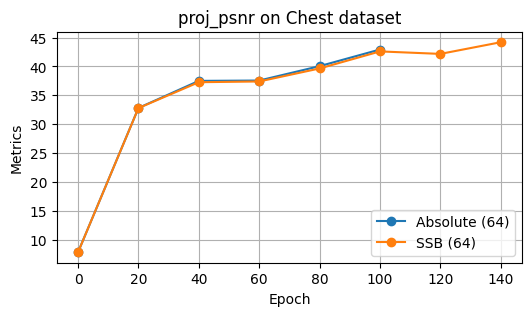

In [15]:
eval_absolute = get_eval_curve(log_file="logs/1_experiment/b_test/chest/absolute_64/log.txt", method_name='Absolute (64)', data_name='Chest')
eval_enhanced = get_eval_curve(log_file="logs/1_experiment/b_test/chest/enhanced_64/log.txt", method_name='SSB (64)', data_name='Chest')

list_eval_info = [eval_absolute, eval_enhanced]
plot_eval_curve(list_eval_info, metric_name='proj_psnr')

### C) Power

#### Bonsai

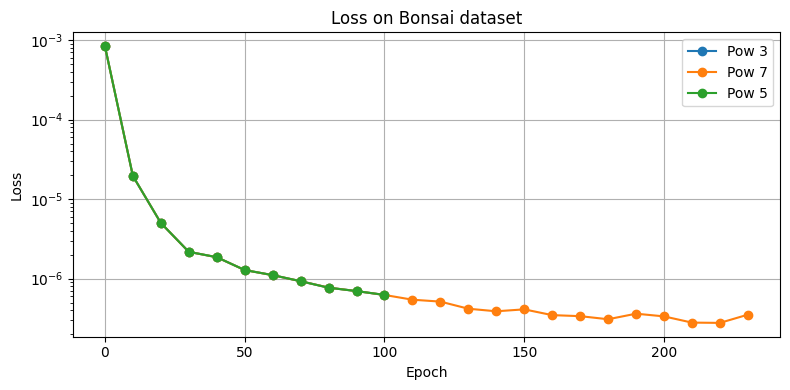

In [23]:
loss_pow_3 = get_loss_curve(log_file="logs/1_experiment/c_test/bonsai/pow_3/log.txt", method_name='Pow 3', data_name='Bonsai')
loss_pow_5 = get_loss_curve(log_file="logs/1_experiment/c_test/bonsai/pow_5/log.txt", method_name='Pow 5', data_name='Bonsai')
loss_pow_7 = get_loss_curve(log_file="logs/1_experiment/c_test/bonsai/pow_7/log.txt", method_name='Pow 7', data_name='Bonsai')

list_loss_info = [loss_pow_3, loss_pow_7, loss_pow_5]#, loss_enhanced]
plot_loss_curve(list_loss_info)

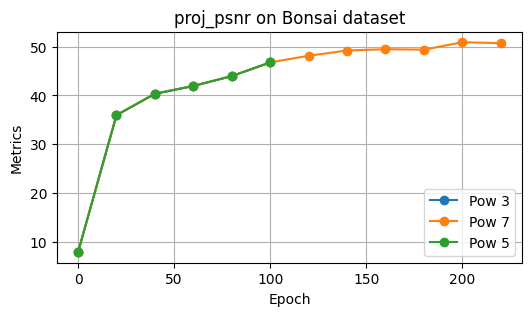

In [22]:
eval_pow_3 = get_eval_curve(log_file="logs/1_experiment/c_test/bonsai/pow_3/log.txt", method_name='Pow 3', data_name='Bonsai')
eval_pow_5 = get_eval_curve(log_file="logs/1_experiment/c_test/bonsai/pow_5/log.txt", method_name='Pow 5', data_name='Bonsai')
eval_pow_7 = get_eval_curve(log_file="logs/1_experiment/c_test/bonsai/pow_7/log.txt", method_name='Pow 7', data_name='Bonsai')
#eval_enhanced = get_eval_curve(log_file="logs/1_experiment/b_test/chest/enhanced_64/log.txt", method_name='SSB (64)', data_name='Chest')

list_eval_info = [eval_pow_3, eval_pow_7, eval_pow_5]
plot_eval_curve(list_eval_info, metric_name='proj_psnr')

### D) Baseline

#### Chest

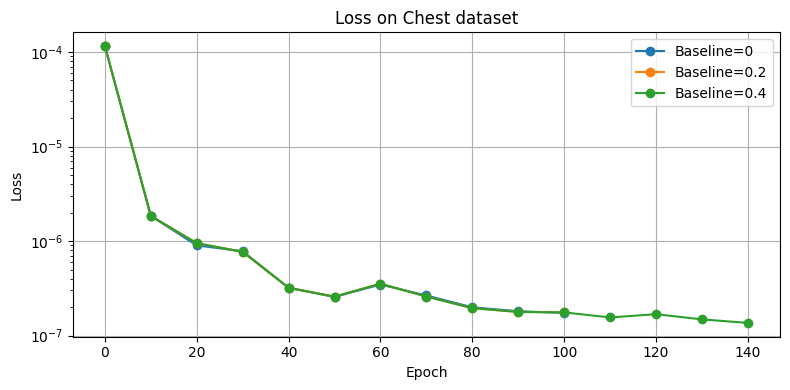

In [28]:
loss_baseline_00 = get_loss_curve(log_file="logs/1_experiment/d_test/chest/baseline_00/log.txt", method_name='Baseline=0', data_name='Chest')
loss_baseline_02 = get_loss_curve(log_file="logs/1_experiment/d_test/chest/baseline_02/log.txt", method_name='Baseline=0.2', data_name='Chest')
loss_baseline_04 = get_loss_curve(log_file="logs/1_experiment/d_test/chest/baseline_04/log.txt", method_name='Baseline=0.4', data_name='Chest')

list_loss_info = [loss_baseline_00, loss_baseline_02, loss_baseline_04]
plot_loss_curve(list_loss_info)

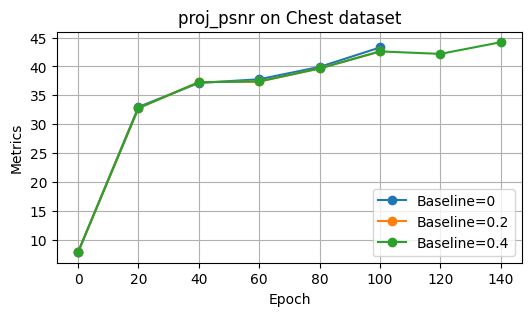

In [29]:
eval_baseline_00 = get_eval_curve(log_file="logs/1_experiment/d_test/chest/baseline_00/log.txt", method_name='Baseline=0', data_name='Chest')
eval_baseline_02 = get_eval_curve(log_file="logs/1_experiment/d_test/chest/baseline_02/log.txt", method_name='Baseline=0.2', data_name='Chest')
eval_baseline_04 = get_eval_curve(log_file="logs/1_experiment/d_test/chest/baseline_04/log.txt", method_name='Baseline=0.4', data_name='Chest')

list_eval_info = [eval_baseline_00, eval_baseline_02, eval_baseline_04]
plot_eval_curve(list_eval_info)

## Experiment 2 - Physic-based Rendering

### Chest

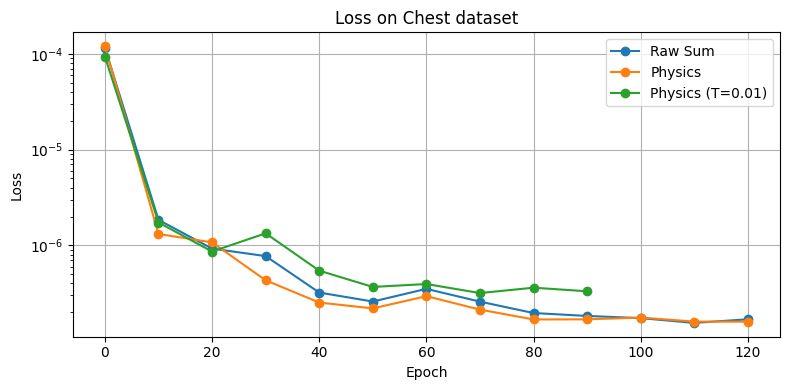

In [4]:
loss_raw_sum = get_loss_curve(log_file="logs/2_experiment/chest/raw_sum/log.txt", method_name='Raw Sum', data_name='Chest')
loss_physics = get_loss_curve(log_file="logs/2_experiment/chest/physics_based/log.txt", method_name='Physics', data_name='Chest')
loss_physics_threshold = get_loss_curve(log_file="logs/2_experiment/chest/physics_based_threshold/log.txt", method_name='Physics (T=0.01)', data_name='Chest')

list_loss_info = [loss_raw_sum, loss_physics, loss_physics_threshold]
plot_loss_curve(list_loss_info)

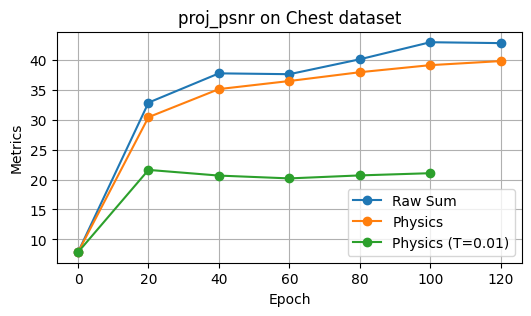

In [5]:
eval_raw_sum = get_eval_curve(log_file="logs/2_experiment/chest/raw_sum/log.txt", method_name='Raw Sum', data_name='Chest')
eval_physics = get_eval_curve(log_file="logs/2_experiment/chest/physics_based/log.txt", method_name='Physics', data_name='Chest')
eval_physics_threshold = get_eval_curve(log_file="logs/2_experiment/chest/physics_based_threshold/log.txt", method_name='Physics (T=0.01)', data_name='Chest')

list_eval_info = [eval_raw_sum, eval_physics, eval_physics_threshold]
plot_eval_curve(list_eval_info)

## Experiment 3
What happens to the train loss if we change the value range of projections. Does the model still converge, or not?

Here we compare the loss curves generated by SaxNerf, using 90 random projections as train images.

- Note 1: we should keep the projections fixed throughout our experiments for reproducibility.
- Note 2: I tried to put leakyrelu as final activation instead of sigmoid.

Ranges:
- 0-0.07
- 0-1

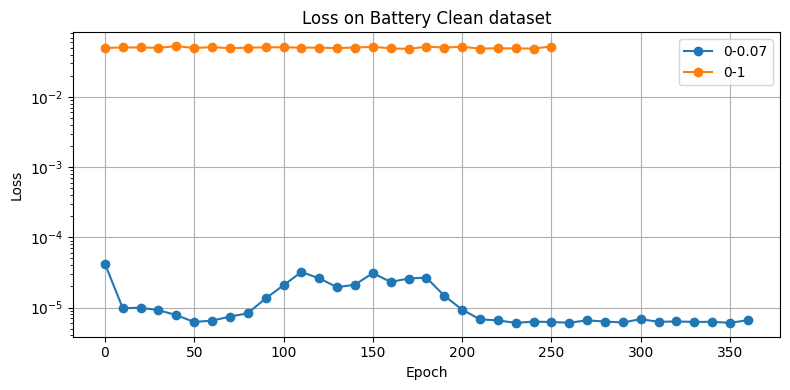

In [11]:
loss_0_07 = get_loss_curve(log_file="../data/logs/log_0_07.txt", method_name='0-0.07', data_name='Battery Clean')
loss_1_00 = get_loss_curve(log_file="../data/logs/log_1_00.txt", method_name='0-1', data_name='Battery Clean')

list_loss_info = [loss_0_07, loss_1_00]
plot_loss_curve(list_loss_info)

At 200th epoch, learning rate steps from 0.001 to 0.0001.

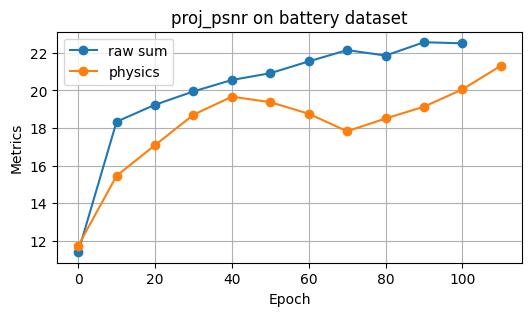

In [3]:
eval_0_07 = get_eval_curve(log_file="../data/logs/method_1/log.txt", method_name='raw sum', data_name='battery')
eval_1_00 = get_eval_curve(log_file="../data/logs/method_3/log.txt", method_name='physics', data_name='battery')


list_eval_info = [eval_0_07, eval_1_00]
plot_eval_curve(list_eval_info)